In [5]:
import pandas as pd
import numpy as np

pd_data = pd.read_csv('data_ML/vegeterianl_dataset.csv', delimiter=r"\s+")
pd_data.drop("ID",axis=1)

,STREAM,SLOPE,ELEVATION,VEGETATION
0,False,steep,3900,chapparal
1,True,moderate,300,riparian
2,True,steep,1500,riparian
3,False,steep,1200,chapparal
4,False,flat,4450,conifer
5,True,steep,5000,conifer
6,True,steep,3000,chapparal


In [6]:
pd_data.sort_values("ELEVATION")

,ID,STREAM,SLOPE,ELEVATION,VEGETATION
1,2,True,moderate,300,riparian
3,4,False,steep,1200,chapparal
2,3,True,steep,1500,riparian
6,7,True,steep,3000,chapparal
0,1,False,steep,3900,chapparal
4,5,False,flat,4450,conifer
5,6,True,steep,5000,conifer


## 실습

In [1]:
# 데이터 전처리
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.tree import plot_tree # 의사결정 나무 규칙을 시각화하기 위한 패키지

# 시각화
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

## 데이터 생성

In [12]:
# Seed를 고정하여 같은 매번 같은 데이터가 만들어지도록 설정
random_state = 2020

# 데이터 개수는 1000개로 설정
n_samples = 200

# 초승달 모양의 분류 데이터 생성
feature, target = make_moons(n_samples=n_samples, noise=0.2, random_state=random_state)

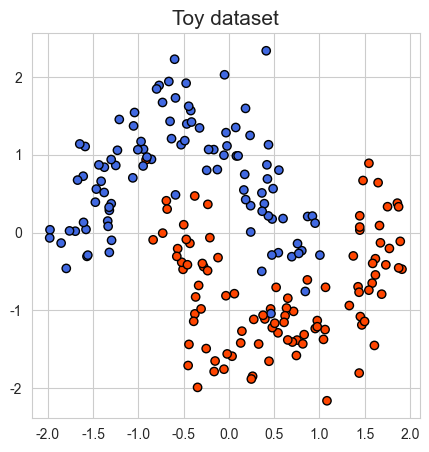

In [26]:
cmap = ListedColormap(['royalblue', 'orangered']) # Toy dataset 시각화를 위한 색 지정

fig = plt.figure(figsize=(5,5)) # figsize = 그림 크기 조절
plt.scatter(feature[:, 0], feature[:, 1], c=target, edgecolors='k', cmap=cmap)
plt.title('Toy dataset',fontsize=15)

plt.show()

## 모델학습

In [27]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=random_state)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [28]:
model = DecisionTreeClassifier(max_depth=3) # 나무 최대 깊이를 제한 가능 : 하이퍼파라미터로 조절 가능
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## 예측결과 확인 및 학습상태 확인

In [29]:
# train, test acc
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy: {:.3f}'.format(acc_train))
print('Testing Accuracy: {:.3f}'.format(acc_test))

Training Accuracy: 0.931
Testing Accuracy: 0.875


In [30]:
# 시각화를 위한 격자 생성
feature = scaler.transform(feature) # feature = np.concatenate([X_train,X_test])

x_min, x_max = feature[:, 0].min() - .5, feature[:, 0].max() + .5
y_min, y_max = feature[:, 1].min() - .5, feature[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)]) # columnwise concat = np.hstack

In [31]:
# 격자 공간에 대한 예측 확률값
y_pred_prob = model.predict_proba(grid)[:, 1] # 2번째 category일 확률값 

# Contour
Z = y_pred_prob.reshape(xx.shape)

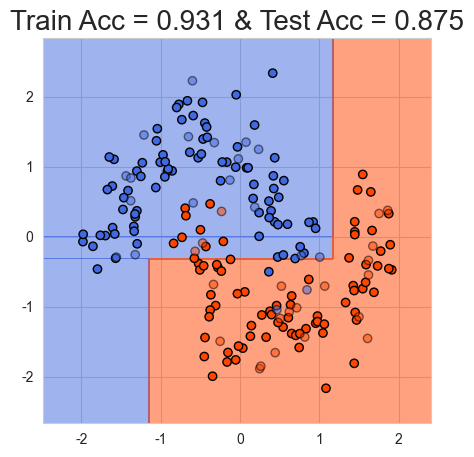

In [32]:
# 시각화: contour를 먼저 그리고, test는 약간 투명하게 표기
plt.figure(figsize=(5, 5))

plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', alpha=0.5, cmap=cmap)
plt.title('Train Acc = {:.3f} & Test Acc = {:.3f}'.format(acc_train, acc_test), fontsize=20)

plt.show()

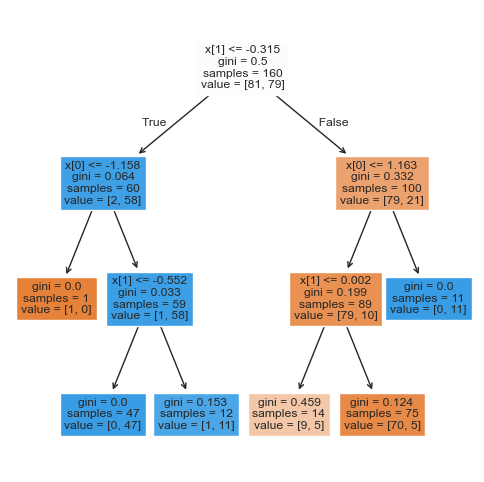

In [33]:
# 학습에 사용되었던 의사결정나무 규칙 시각화
plt.figure(figsize=(6, 6))
plot_tree(decision_tree=model, filled=True)  # filled : 많은 클래스가 포함되어 있는 것으로 색 표기
plt.show()

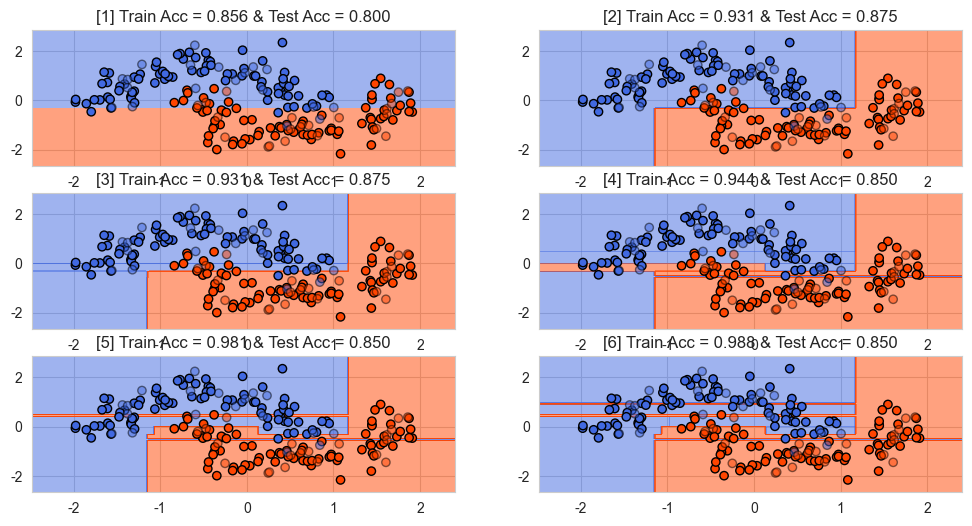

In [34]:
max_depths = [1, 2, 3, 4, 5, 6]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
axs = axs.ravel()

for i, max_depth in enumerate(max_depths):
    
    # 모델 학습
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # 예측
    # 1. train, test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    
    # 2. grid
    y_pred_prob = model.predict_proba(grid)[:, 1]
    Z = y_pred_prob.reshape(xx.shape)
    
    # plot
    axs[i].contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', alpha=0.5, cmap=cmap)
    axs[i].set_title('[{}] Train Acc = {:.3f} & Test Acc = {:.3f}'.format(max_depth, acc_train, acc_test))
        
plt.show()